In [1]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import csv
from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
%matplotlib inline

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=1.8, color='black')

fontdict={'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

## Experimental Case 

# singles

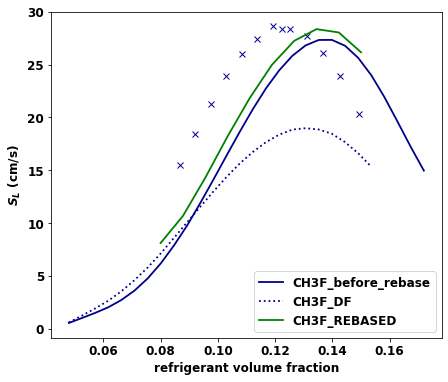

In [5]:
#singles on one plot
import csv
plt.rcParams['figure.figsize'] = [7, 6] 


#collect experimental data
exp_path = '/work/westgroup/nora/Code/projects/halogens/refrigerants/singles/experimental_data/experimental_data.csv'
data = dict()

with open(exp_path,'r') as csvfile: 
    csvreader = csv.DictReader(csvfile)

    for row in csvreader:
        formula = row['formula']
        vol_frac = row['volume_frac']
        flamespeed = row['Su (cm/s)']

        if formula not in data:
            data[formula] = ([], [])  # tuple of two lists, one for volume fractions, one for flame speeds
        data[formula][0].append(float(vol_frac))
        data[formula][1].append(float(flamespeed))

#start plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)

xvals = [0.150,0.050,0.050,0.150,0.050,0.115,0.07,0.095]
labelLines(ax1.get_lines(), fontsize=10, xvals=xvals)



colors = {'CH2F2': 'darkorange',
          'CH2FCHF2': 'tab:pink',
          'CH3CF3': 'tab:purple',
          'CH3CHF2': 'tab:red',
          'CF3CFCH2': 'gray',
          'CF3CHCH2': 'tab:brown',
          'CH2FCH2F': 'tab:blue', 
          'C2H5F': 'green',
          'CH3F': 'darkblue' }


#indices to stop at for plotting: 
stop_indices_new_singles = {'CH2F2': -1,
          'CH2FCHF2': -25,
          'CH3CF3': -12,
          'CH3CHF2': -31,
          'CF3CFCH2': -1,
          'CF3CHCH2': -1,
          'CH2FCH2F': -31, 
          'C2H5F': -33,
          'CH3F': -17}
stop_indices_old_singles = {'CH2F2': -1,
          'CH2FCHF2': -30,
          'CH3CF3': -6,
          'CH3CHF2': -14,
          'CF3CFCH2': -1,
          'CF3CHCH2': -1,
          'CH2FCH2F': -7, 
          'C2H5F': -33,
          'CH3F': -21}


#gather the new singles data
singles_speeds_dictionary = {}
singles_path = '/work/westgroup/nora/Code/projects/halogens/refrigerants/halogens_paper/changing_RMG_Py/on_USNCM_blends/singles/'
#singles = [file for file in os.listdir(singles_path) if 'F' in file and 'with_' not in file]
singles=['CH3F']

for single in singles:  

    path_ = '/work/westgroup/nora/Code/projects/halogens/refrigerants/halogens_paper/changing_RMG_Py/on_USNCM_blends/'
    full_path = path_+f'singles/{single}/data/'
        
    #do we have flamespeeds? 
    if not os.path.exists(full_path): 
        continue
    if os.listdir(full_path)==[]:
        continue

    csv_files = [file for file in os.listdir(full_path) if '.csv' in file]
    vfs = []
    speeds = []
    for csv_ in csv_files:
        try: 
            #get the speed
            speed_data = pd.read_csv(full_path+csv_)
            speed = speed_data['velocity'][0]*100 #in cm/s
            speeds.append(speed)
            #get the equivalence ratio
            vf = float(re.search('(\S+)\.csv', csv_).group(1))
            vfs.append(vf)
        #now save to the dictionary
        except KeyError as e: 
            try: 
                speed_data = pd.read_csv(full_path+csv_)
                speed = speed_data.iat[0, 0]*100 #in cm/s
                speeds.append(speed)
                #get the equivalence ratio
                vf = float(re.search('(\S+)\.csv', csv_).group(1))
                vfs.append(vf) 
            except IndexError: 
                continue
    singles_speeds_dictionary[single]=[vfs,speeds]

#now plot the new singles data
put_on_plot = []
for single_label, data_list in singles_speeds_dictionary.items():
    stop_at = stop_indices_new_singles[single_label]
    [vfs,speeds] = data_list
    ax1.plot(vfs[:stop_at],speeds[:stop_at], '-',c=colors[single_label], label=f'{single_label}_before_rebase')
    if len(vfs)>1: 
        put_on_plot.append(single_label)

    
#plot experimental data
for blend_label, tuple_ in data.items(): 
    (exp_volfrac, exp_flamespeeds) = tuple_
    if blend_label.replace(' ', '') in put_on_plot:
        ax1.plot(exp_volfrac,exp_flamespeeds,'x',c=colors[blend_label.replace(' ', '')])
        
#plot all of the past singles 
old_singles = [file for file in os.listdir('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/singles/') if 'F' in file]

for old_single in old_singles: 
    #edit the name of the folder
    if '_2nd_attempt' in old_single: 
        old_single=old_single.replace('_2nd_attempt','')
    
    #grab the csv and read it
    old_single_vfs = []
    old_single_spds = []
    try: 
        csv_path = f'/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/singles/{old_single}/speeds.csv'
        data = pd.read_csv(csv_path)
        first_column_name=True
        for column_name, column_data in data.iteritems():
            if first_column_name==True: #only do this for the first column name
                thing_to_remove = re.search('^(\S+cti)', column_name).group(1)
                column_name=column_name.replace(thing_to_remove,'')
                first_column_name=False
            old_single_vfs.append(float(column_name))
            old_single_spds.append(column_data.values[0]*100)
    except FileNotFoundError: 
        full_path =f'/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/singles/{old_single}/data/'
        csv_files = [file for file in os.listdir(full_path) if re.match('[0-9]\.[0-9]+.csv', file)]
        vfs = []
        speeds = []
        for csv_ in csv_files: 
            #get the speed
            speed_data = pd.read_csv(full_path+csv_)
            speed = speed_data['velocity'][0]*100 #in cm/s
            old_single_spds.append(speed)
            #get the vf
            vf = float(re.search('(\S+)\.csv', csv_).group(1).replace('test_', ''))
            old_single_vfs.append(vf)

        
    #plot old singles
    if old_single in put_on_plot:
        stop_at = stop_indices_old_singles[old_single]
        ax1.plot(old_single_vfs[:stop_at],old_single_spds[:stop_at],':',c=colors[old_single], label=f'{old_single}_DF')

        
################# NEW STUFF #######################

#/all_families_I_have_ever_touched/ includes all git checkouts of families that DF and I have ever added training data to and the ANL_Brown_pdep_library
path_ = '/work/westgroup/nora/Code/projects/halogens/refrigerants/halogens_paper/models_diff/CH3F_before_and_after_rebase/rebased_RMG-Py-database/regenerating_model_at_different_commits/all_families_I_have_ever_touched/data/'
csv_files = [x for x in os.listdir(path_) if '.csv' in x]
speeds = []
vfs = []
for csv_ in csv_files:
        try: 
            #get the speed
            speed_data = pd.read_csv(path_+csv_)
            speed = speed_data['velocity'][0]*100 #in cm/s
            speeds.append(speed)
            #get the equivalence ratio
            vf = float(re.search('(\S+)\.csv', csv_).group(1))
            vfs.append(vf)
        #now save to the dictionary
        except KeyError as e: 
            try: 
                speed_data = pd.read_csv(full_path+csv_)
                speed = speed_data.iat[0, 0]*100 #in cm/s
                speeds.append(speed)
                #get the equivalence ratio
                vf = float(re.search('(\S+)\.csv', csv_).group(1))
                vfs.append(vf) 
            except IndexError: 
                continue
#ax1.plot(vfs[:stop_at],speeds[:stop_at], '--',c=colors[single_label], label=f'{single_label}_rebased')



#projects/PFAS/AIChE_2024/tools_for_retraining/HPL/on_rebased_Feb2025_and_including_PFLactone_carbene_ether_thermo/without_DF_edits_to_fitting/CH3F_model/chemkin (40 species)
#SAME MODEL AS projects/halogens/refrigerants/halogens_paper/models_diff/CH3F_before_and_after_rebase/rebased_RMG-Py-database/regenerating_model_at_different_commits/FINAL_model
# vfs_and_speeds = [\
    
# vfs = []
# speeds = []
# for vf, speed in vfs_and_speeds: 
#     vfs.append(vf)
#     speeds.append(speed*100)

vfs = list(np.linspace(0.08, 0.15, 10))
    
speeds = [0.08109426415994765, 0.10661411678893995, 0.14260567032173221, 0.18174427945819008, 0.21818811191219595, 0.2497487261202542, 0.2724055996691084, 0.283482580503237, 0.28031761767881425, 0.26154653849897186]
    
ax1.plot(vfs,np.array(speeds)*100, '-',c='g', label=f'{single_label}_REBASED')

    
    
plt.xlabel('refrigerant volume fraction',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
ax1.legend()    

# Blends

# File System Stuff

In [11]:
singles_folder = '/work/westgroup/nora/Code/projects/halogens/refrigerants/halogens_paper/changing_RMG_Py/on_USNCM_blends/singles/'
blends = [folder for folder in os.listdir(singles_folder) if 'C' in folder and 'with' not in folder]

for blend in blends: 
    print(blend)
    #data_folder = f'./{blend}/chemkin'
    # if os.path.exists(data_folder):
    #     continue
    # else:
    new_path = f'/work/westgroup/nora/Code/projects/halogens/refrigerants/halogens_paper/models_diff/CH3F_before_and_after_rebase/rebased_RMG-Py-database/other_singles/{blend}'
    command = f'mkdir {new_path}'
    os.system(command)
    #command=f'scp flame_calc.py flame_speed_run.sh {blend}'
    command = f'scp {singles_folder}{blend}/input.py {singles_folder}{blend}/run.sh {new_path}'
    os.system(command)

C2H5F
CH2F2
CH2FCH2F
CH2FCHF2
CH3CF3
CH3CHF2
CH3F
